In [1]:
import os
import pandas as pd
import numpy as np
import regex as re
import pythainlp

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from time import time

In [2]:
from preprocessing import Word_Embedder
from preprocessing import Text_processing
from text_classification import Text_classification, Text_classification_for_prediction, count_based_model
from text_classification import prepare_data_for_text_classification

In [3]:
# os.chdir('Thai_NLP')
os.getcwd()
# os.listdir()

'/home/kamin/Thai_NLP'

In [6]:
x = count_based_model({'pos': ['word_configs\\pos.txt', 'word_configs\\pos_manual.txt'], 'neg': ['word_configs\\neg.txt', 'word_configs\\neg_manual.txt'], 'neu': ['word_configs\\neu.txt'],
                      'q': ['word_configs\\q.txt', 'word_configs\\q_manual.txt']},
                      is_sentiment_analysis=True, 
                      do_load_models=True, 
                      model_path= 'trained_models')

FileNotFoundError: [Errno 2] No such file or directory: 'word_configs\\pos.txt'

In [12]:
x.fit(Tr,Te)

running grid search and 5-folds cross validation
best_C: 1, f1-score: [0.55146125 0.27612761 0.3853211  0.14197531], f1-macro: 0.3387213168889381


In [13]:
x.predict('ไม่อร่อยเลย ไม่ดีอะ')

'neg'

In [15]:
x.predict('อร่อยดีนะ ชอบมากอะ')

'pos'

# wisesight sentiment analysis

In [10]:
os.chdir('Sentiment Analysis')

In [11]:
tr = []
with open('train.txt', 'r', encoding='utf8') as f:
    for line in f:
        line = line.strip()
        if line != '':
            tr.append(line)
            
tr_label = []
with open('train_label.txt', 'r', encoding='utf8') as f:
    for line in f:
        line = line.strip()
        if line != '':
            tr_label.append(line)
            
te = []
with open('test.txt', 'r', encoding='utf8') as f:
    for line in f:
        line = line.strip()
        if line != '':
            te.append(line)
            
te_label = []
with open('test_label.txt', 'r', encoding='utf8') as f:
    for line in f:
        line = line.strip()
        if line != '':
            te_label.append(line)

In [12]:
Tr = pd.DataFrame({'texts': tr, 'labels': tr_label})
Te = pd.DataFrame({'texts': te, 'labels': te_label})

# TRUE-intent data

In [4]:
# os.chdir('Thai_NLP')
os.getcwd()
# os.listdir()'/home/kamin/Thai_NLP'

'/home/kamin/Thai_NLP'

In [16]:
os.chdir('kamin/Thai_NLP')

In [5]:
df = pd.read_csv('mari-train-balanced.csv')
df2 = pd.read_csv('mari-test-balanced.csv')
df.head()

,texts,texts_deepcut,action,object,destination
0,สอบถาม package internet ว่ามีแบบไหนบ้างครับ,สอบถาม package internet ว่า มี แบบ ไหน บ้าง ครับ,enquire,promotion,promotions
1,พอดีพี่ซื้อเบอร์ซิม Inter ไปแล้ว แต่ยังไม่ได้ล...,พอดี พี่ ซื้อ เบอร์ซิม Inter ไป แล้ว แต่ ยัง ไ...,enquire,detail,billing and payment
2,ค่ะ พี่ค่ะ คืออยู่ๆ เน็ตเล่นไม่ได้อ่ะค่ะ,ค่ะ พี่ ค่ะ คือ อยู่ ๆ เน็ต เล่น ไม่ ได้ อ่ะ ค่ะ,enquire,internet,internet
3,การเปลี่ยน ระบบจาก ทรู เป็น ทรูเอช มีค่าบริการ...,การ เปลี่ยน ระบบ จาก ทรู เป็น ทรูเอช มี ค่า บร...,enquire,rate,promotions
4,เช็คให้หน่อยได้ไหมครับ ว่าเบอร์ของผม เปลี่ยนเป...,เช็ค ให้ หน่อย ได้ ไหม ครับ ว่า เบอร์ ของ ผม เ...,enquire,package,promotions


In [6]:
df = df.rename(columns={'destination': 'labels'})[['texts', 'labels']]
df2 = df2.rename(columns={'destination': 'labels'})[['texts', 'labels']]

In [7]:
df.head()

,texts,labels
0,สอบถาม package internet ว่ามีแบบไหนบ้างครับ,promotions
1,พอดีพี่ซื้อเบอร์ซิม Inter ไปแล้ว แต่ยังไม่ได้ล...,billing and payment
2,ค่ะ พี่ค่ะ คืออยู่ๆ เน็ตเล่นไม่ได้อ่ะค่ะ,internet
3,การเปลี่ยน ระบบจาก ทรู เป็น ทรูเอช มีค่าบริการ...,promotions
4,เช็คให้หน่อยได้ไหมครับ ว่าเบอร์ของผม เปลี่ยนเป...,promotions


In [8]:
tmp_data = prepare_data_for_text_classification(train_dataframe=df,
                                                test_dataframe=df2,
                                                max_len=64,
                                                min_len=1,
                                                threshold_tfxidf=0.005
                                               )

billing and payment      3916
promotions               2280
other queries            1823
internet                 1588
international dialing     336
true money                188
lost and stolen           172
Name: labels, dtype: int64


/home/kamin/.virtualenv/dev36/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1 2 3 4 5 6], y=[1 0 3 ... 0 0 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


CW2: {0: 0.3758572887786371, 1: 0.6455513784461153, 2: 0.8073818666248727, 3: 0.9268621806405182, 4: 4.380527210884353, 5: 7.829027355623101, 6: 8.557308970099667}


In [9]:
tc =Text_classification(prepared_data_dict=tmp_data, 
                        do_deep_learning=True, 
                        do_linear_classifier=True, 
                        is_sequence_prediciton=False)

Created the path: trained_models/text_classification
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
word_vectors (InputLayer)       [(None, 64, 300)]    0                                            
__________________________________________________________________________________________________
masks (InputLayer)              [(None, 64)]         0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 64, 256)      330240      word_vectors[0][0]               
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 64, 256)      296448      bidirectional[0][0]              
_________________________________________

Linear classifier part
running 5-fold cv
Best C: 5, Best f1-scores: [0.88116243 0.90909091 0.77590361 0.88172043 0.80133185 0.85617597
 0.95238095]
Unweighted f1-score: 0.8653951658723057, Weighted f1-score: 0.8477599212454612


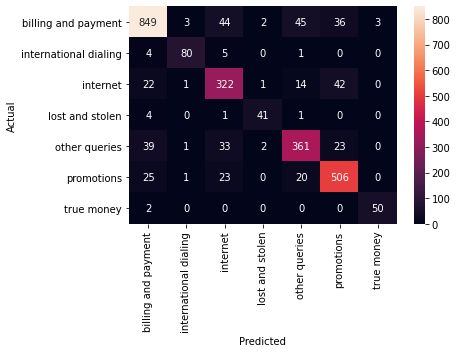

In [10]:
tc.fit_linear_classifier()

In [ ]:
t1 =time()
tc.fit_SVM_classifier()
print(f'time used: {time() - t1}')

SVM classifier part
running 5-fold cv


In [11]:
tc.fit_deep_learning()

Epoch 1/500
161/161 [==============================] - 43s 267ms/step - loss: 5.2349 - precision: 0.5570 - recall: 0.1550 - val_loss: 3.9366 - val_precision: 1.0000 - val_recall: 0.0027 - lr: 0.0010
Epoch 2/500
161/161 [==============================] - 39s 242ms/step - loss: 2.7948 - precision: 0.7257 - recall: 0.4203 - val_loss: 2.7909 - val_precision: 0.9621 - val_recall: 0.1266 - lr: 0.0010
Epoch 3/500
161/161 [==============================] - 40s 250ms/step - loss: 2.1212 - precision: 0.7195 - recall: 0.4373 - val_loss: 2.0219 - val_precision: 0.8672 - val_recall: 0.4308 - lr: 0.0010
Epoch 4/500
161/161 [==============================] - 40s 246ms/step - loss: 1.7012 - precision: 0.7331 - recall: 0.4687 - val_loss: 1.7346 - val_precision: 0.7878 - val_recall: 0.4756 - lr: 0.0010
Epoch 5/500
161/161 [==============================] - 38s 239ms/step - loss: 1.5439 - precision: 0.7210 - recall: 0.4641 - val_loss: 2.0209 - val_precision: 0.5560 - val_recall: 0.3636 - lr: 0.0010
Epoch

KeyboardInterrupt: 

In [8]:
# tc.fit_ensemble(5e-3,0.1)

linear_prediction: [0.0339347  0.00350534 0.01975266 0.00268576 0.03924427 0.89877451
 0.00210276]
dl_prediction: [5.7365797e-03 9.1864483e-04 1.1742757e-02 1.7704522e-04 1.6022399e-02
 9.6461564e-01 7.8693411e-04]
-----
linear_prediction: [0.59457259 0.01546059 0.22307242 0.00660594 0.11336827 0.03403696
 0.01288323]
dl_prediction: [0.6991231  0.00415532 0.05836102 0.00098591 0.2244429  0.01117605
 0.00175574]
-----
linear_prediction: [0.0558655  0.00281539 0.90660512 0.00202166 0.01439435 0.01731933
 0.00097867]
dl_prediction: [1.8012861e-02 6.9103797e-04 9.5653814e-01 3.2450768e-04 1.2877582e-02
 1.1425815e-02 1.3006906e-04]
-----
linear_prediction: [0.23185722 0.00862956 0.00656977 0.00102346 0.16114261 0.57616548
 0.01461189]
dl_prediction: [5.2739494e-02 4.3769574e-04 1.4137422e-02 4.6365586e-04 8.4993333e-01
 7.8846194e-02 3.4423808e-03]
-----
linear_prediction: [0.21933552 0.00306056 0.07012364 0.00992462 0.05556976 0.62816136
 0.01382454]
dl_prediction: [3.0957642e-01 7.269858

11/11 [==============================] - 1s 75ms/step - loss: 2.2747 - precision: 0.0704 - recall: 0.0037 - val_loss: 2.1464 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/500
11/11 [==============================] - 0s 21ms/step - loss: 1.8477 - precision: 0.5604 - recall: 0.0239 - val_loss: 2.0835 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/500
11/11 [==============================] - 0s 16ms/step - loss: 1.5258 - precision: 0.8487 - recall: 0.0741 - val_loss: 2.0269 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/500
11/11 [==============================] - 0s 26ms/step - loss: 1.2860 - precision: 0.8939 - recall: 0.1382 - val_loss: 1.9780 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 5/500
11/11 [==============================] - 0s 27ms/step - loss: 1.1147 - precision: 0.9111 - recall: 0.2049 - val_loss: 1.9382 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.00

Epoch 84/500
11/11 [==============================] - 0s 24ms/step - loss: 0.2768 - precision: 0.9469 - recall: 0.9188 - val_loss: 0.7979 - val_precision: 0.8535 - val_recall: 0.7488 - lr: 0.0010
Epoch 85/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2796 - precision: 0.9472 - recall: 0.9190 - val_loss: 0.7988 - val_precision: 0.8535 - val_recall: 0.7488 - lr: 0.0010
Epoch 86/500
11/11 [==============================] - 0s 23ms/step - loss: 0.2757 - precision: 0.9499 - recall: 0.9193 - val_loss: 0.7910 - val_precision: 0.8521 - val_recall: 0.7491 - lr: 0.0010
Epoch 87/500
11/11 [==============================] - 0s 25ms/step - loss: 0.2718 - precision: 0.9463 - recall: 0.9164 - val_loss: 0.7828 - val_precision: 0.8549 - val_recall: 0.7526 - lr: 0.0010
Epoch 88/500
11/11 [==============================] - 0s 21ms/step - loss: 0.2717 - precision: 0.9469 - recall: 0.9163 - val_loss: 0.7713 - val_precision: 0.8576 - val_recall: 0.7599 - lr: 0.0010
Epoch 89/500
11/11 [

Epoch 126/500
11/11 [==============================] - 0s 11ms/step - loss: 0.2284 - precision: 0.9467 - recall: 0.9224 - val_loss: 0.6473 - val_precision: 0.8643 - val_recall: 0.8063 - lr: 0.0010
Epoch 127/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2279 - precision: 0.9460 - recall: 0.9232 - val_loss: 0.6575 - val_precision: 0.8606 - val_recall: 0.7982 - lr: 0.0010
Epoch 128/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2284 - precision: 0.9475 - recall: 0.9225 - val_loss: 0.6511 - val_precision: 0.8622 - val_recall: 0.7994 - lr: 0.0010
Epoch 129/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2273 - precision: 0.9483 - recall: 0.9226 - val_loss: 0.6477 - val_precision: 0.8646 - val_recall: 0.8036 - lr: 0.0010
Epoch 130/500
11/11 [==============================] - 0s 24ms/step - loss: 0.2259 - precision: 0.9482 - recall: 0.9237 - val_loss: 0.6457 - val_precision: 0.8639 - val_recall: 0.8059 - lr: 0.0010
Epoch 131/500
1

Epoch 168/500
11/11 [==============================] - 0s 11ms/step - loss: 0.2003 - precision: 0.9482 - recall: 0.9290 - val_loss: 0.6130 - val_precision: 0.8569 - val_recall: 0.8105 - lr: 0.0010
Epoch 169/500
11/11 [==============================] - 0s 21ms/step - loss: 0.1984 - precision: 0.9462 - recall: 0.9264 - val_loss: 0.6080 - val_precision: 0.8571 - val_recall: 0.8147 - lr: 0.0010
Epoch 170/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2005 - precision: 0.9474 - recall: 0.9269 - val_loss: 0.6132 - val_precision: 0.8557 - val_recall: 0.8120 - lr: 0.0010
Epoch 171/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2003 - precision: 0.9478 - recall: 0.9285 - val_loss: 0.6155 - val_precision: 0.8562 - val_recall: 0.8109 - lr: 0.0010
Epoch 172/500
11/11 [==============================] - 0s 10ms/step - loss: 0.1985 - precision: 0.9480 - recall: 0.9292 - val_loss: 0.6105 - val_precision: 0.8591 - val_recall: 0.8140 - lr: 0.0010
Epoch 173/500
1

Epoch 210/500
11/11 [==============================] - 0s 23ms/step - loss: 0.1865 - precision: 0.9463 - recall: 0.9257 - val_loss: 0.5902 - val_precision: 0.8557 - val_recall: 0.8166 - lr: 0.0010
Epoch 211/500
11/11 [==============================] - 0s 11ms/step - loss: 0.1857 - precision: 0.9455 - recall: 0.9256 - val_loss: 0.5932 - val_precision: 0.8555 - val_recall: 0.8155 - lr: 0.0010
Epoch 212/500
11/11 [==============================] - 0s 10ms/step - loss: 0.1855 - precision: 0.9470 - recall: 0.9292 - val_loss: 0.5968 - val_precision: 0.8537 - val_recall: 0.8147 - lr: 0.0010
Epoch 213/500
11/11 [==============================] - 0s 10ms/step - loss: 0.1864 - precision: 0.9474 - recall: 0.9295 - val_loss: 0.6029 - val_precision: 0.8551 - val_recall: 0.8151 - lr: 0.0010
Epoch 214/500
11/11 [==============================] - 0s 11ms/step - loss: 0.1852 - precision: 0.9445 - recall: 0.9282 - val_loss: 0.6013 - val_precision: 0.8542 - val_recall: 0.8155 - lr: 0.0010
Epoch 215/500
1

# Prediction test

In [19]:
os.chdir('..')
os.getcwd()

'/home/kamin/Thai_NLP'

In [3]:
TC = Text_classification_for_prediction( path_to_tfxidf= 'models_for_real_deployment/tf-idf_encoder.joblib',
                                        model_path = 'models_for_real_deployment/text_classification')

loading deeplearning model
loading logistic regression model
loading the embedder and tokenizer


In [4]:
TC.predict('ทำไมอินเตอร์เนตผมช้ามากๆเลยครับ')

{'logistic_regression': {'billing and payment': 0.04239599199883396,
  'international dialing': 0.002549459155609322,
  'internet': 0.9208810924214039,
  'lost and stolen': 0.0012800403966359952,
  'other queries': 0.023315610086824624,
  'promotions': 0.007684539984556279,
  'true money': 0.0018932659561359188},
 'deeplearning': {'billing and payment': 0.028904313,
  'promotions': 0.0071565504,
  'other queries': 0.007842738,
  'internet': 0.9531318,
  'international dialing': 0.0022579879,
  'true money': 0.0004241576,
  'lost and stolen': 0.0002824572}}

In [5]:
TC.predict('โทรศัพท์ผมหาย ผมต้องทำยังไงบ้างครับ')

{'logistic_regression': {'billing and payment': 0.04957993119467105,
  'international dialing': 0.01410676326467718,
  'internet': 0.06836631971022208,
  'lost and stolen': 0.8019789371395918,
  'other queries': 0.03284068079988682,
  'promotions': 0.03211143365895513,
  'true money': 0.0010159342319958995},
 'deeplearning': {'billing and payment': 0.0014396305,
  'promotions': 4.500933e-05,
  'other queries': 0.0007126399,
  'internet': 0.00016222849,
  'international dialing': 5.7639336e-05,
  'true money': 1.607708e-05,
  'lost and stolen': 0.9975668}}

In [6]:
TC.predict('สอบถามบริการโทรต่างประเทศน่ะครับ')

{'logistic_regression': {'billing and payment': 0.009000535616081102,
  'international dialing': 0.9136489626289862,
  'internet': 0.004919699100065405,
  'lost and stolen': 0.0023058219177843234,
  'other queries': 0.053685728274877664,
  'promotions': 0.014218651980250626,
  'true money': 0.0022206004819546364},
 'deeplearning': {'billing and payment': 0.003268424,
  'promotions': 0.0007003219,
  'other queries': 0.0016304805,
  'internet': 0.0005526525,
  'international dialing': 0.99374676,
  'true money': 3.111233e-05,
  'lost and stolen': 7.024724e-05}}